In [1]:
# Clustering and Dimentionnality Reduction

<div class="alert alert-block alert-danger">

1. Import the CIFAR-10 dataset using the following code and create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

<div/>

<div class="alert alert-block alert-warning">The CIFAR-10 dataset is composed of 60000 RGB images( 32x32 pixels), categorized into 10 classes with 6000 images per class. It is divided into 50000 training images and 10000 test images.
<div/>

In [25]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
(trainX, trainy), _ = cifar10.load_data()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)


<div class="alert alert-block alert-danger">


2. Visualize some samples from the dataset with their corresponding labels.

3. Normalize the training data by dividing all values by 255.

4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.

5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.

6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?

7. Compute the Davies-Bouldin score for all generated models.

8. Display the confusion matrix and the classification reports for all models. What do you observe?

9. Display some misclassifications for the best model (image with the true label and predicted label).

10. Try to enhance the performance of the best model.
<div/>

In [27]:
classes_to_keep = ["airplane", "automobile", "bird", "cat"]
indices_to_keep = [label_names.index(cls) for cls in classes_to_keep]
train_indices = np.isin(trainy.flatten(), indices_to_keep)
trainX_filtered = trainX[train_indices]
trainy_filtered = trainy[train_indices]
trainy_filtered = np.array([indices_to_keep.index(label) for label in trainy_filtered.flatten()])


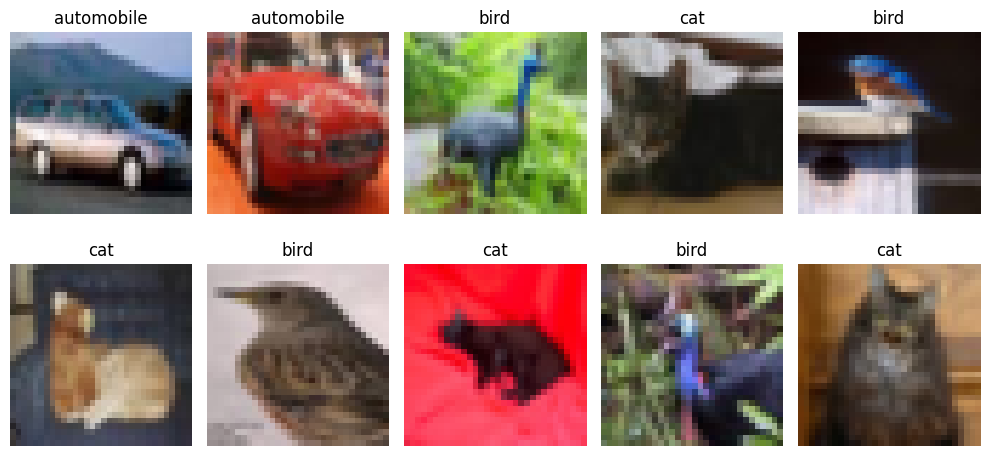

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(trainX_filtered[i])
    ax.set_title(label_names[indices_to_keep[trainy_filtered[i]]])
    ax.axis('off')
plt.tight_layout()
plt.show()


In [29]:
trainX_filtered_normalized = trainX_filtered.astype('float32') / 255.0



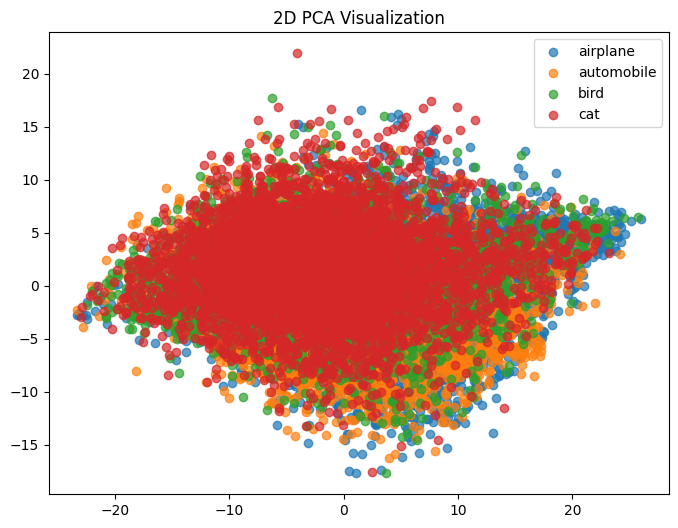

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trainX_pca = pca.fit_transform(trainX_filtered_normalized.reshape(len(trainX_filtered), -1))

plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes_to_keep):
    idx = trainy_filtered == i
    plt.scatter(trainX_pca[idx, 0], trainX_pca[idx, 1], label=cls, alpha=0.7)
plt.title("2D PCA Visualization")
plt.legend()
plt.show()


In [31]:
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(trainX_filtered_normalized.reshape(len(trainX_filtered), -1))


pca_95 = PCA(n_components=0.95)
trainX_pca_95 = pca_95.fit_transform(trainX_filtered_normalized.reshape(len(trainX_filtered), -1))
kmeans_pca_95 = KMeans(n_clusters=4, random_state=42)
kmeans_pca_95_labels = kmeans_pca_95.fit_predict(trainX_pca_95)


lda = LDA(n_components=3)
trainX_lda = lda.fit_transform(trainX_filtered_normalized.reshape(len(trainX_filtered), -1), trainy_filtered)
kmeans_lda = KMeans(n_clusters=4, random_state=42)
kmeans_lda_labels = kmeans_lda.fit_predict(trainX_lda)


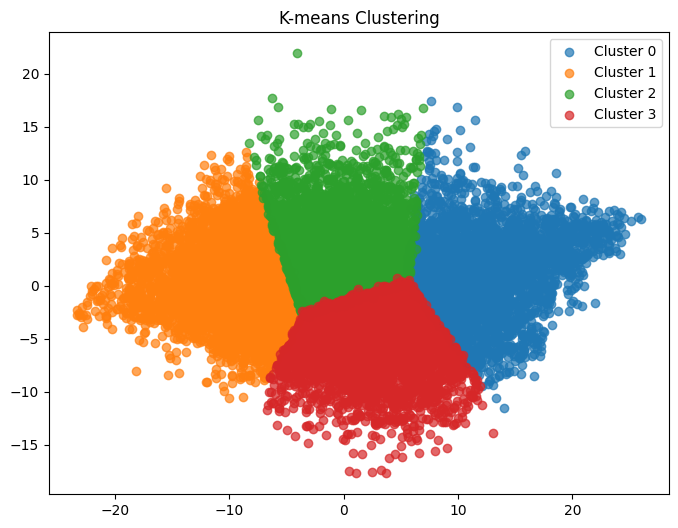

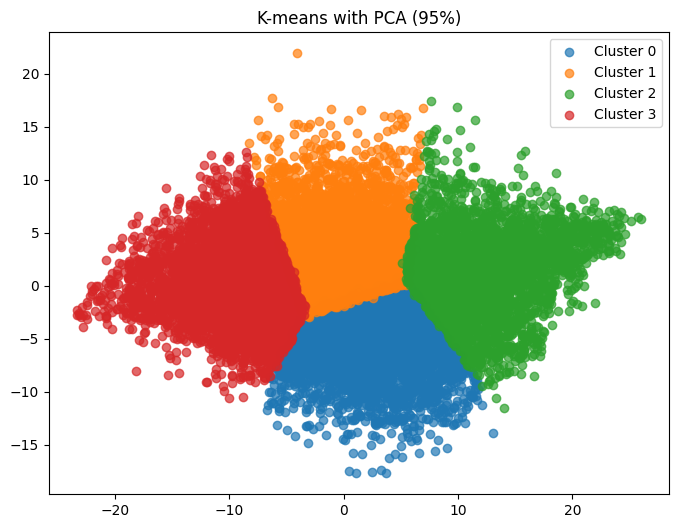

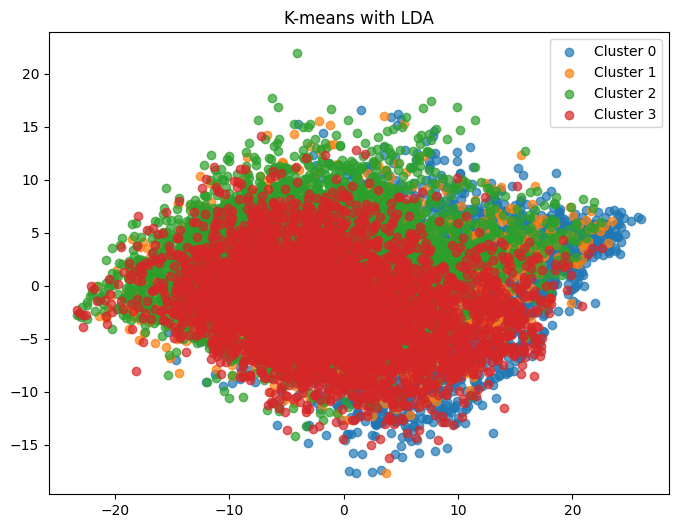

In [32]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    for i in range(4):
        idx = labels == i
        plt.scatter(data[idx, 0], data[idx, 1], label=f"Cluster {i}", alpha=0.7)
    plt.title(title)
    plt.legend()
    plt.show()

plot_clusters(trainX_pca, kmeans_labels, "K-means Clustering")
plot_clusters(trainX_pca, kmeans_pca_95_labels, "K-means with PCA (95%)")
plot_clusters(trainX_pca, kmeans_lda_labels, "K-means with LDA")


In [33]:
from sklearn.metrics import davies_bouldin_score

db_kmeans = davies_bouldin_score(trainX_filtered_normalized.reshape(len(trainX_filtered), -1), kmeans_labels)
db_pca = davies_bouldin_score(trainX_pca_95, kmeans_pca_95_labels)
db_lda = davies_bouldin_score(trainX_lda, kmeans_lda_labels)

print(f"Davies-Bouldin Scores:\nK-means: {db_kmeans}\nK-means with PCA: {db_pca}\nK-means with LDA: {db_lda}")


Davies-Bouldin Scores:
K-means: 2.452368156221776
K-means with PCA: 2.357842822560296
K-means with LDA: 1.0626851405550903


Classification Report - K-means:
              precision    recall  f1-score   support

           0       0.47      0.36      0.41      5000
           1       0.37      0.33      0.35      5000
           2       0.00      0.00      0.00      5000
           3       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000



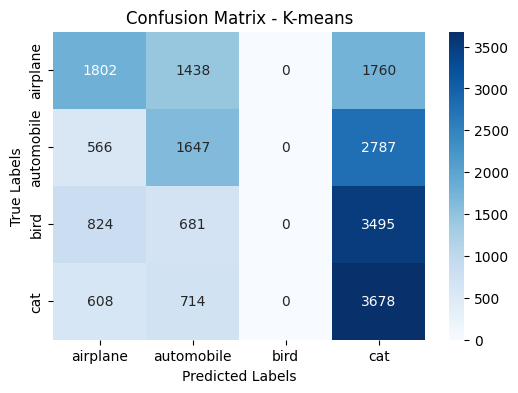

Classification Report - K-means with PCA (95% variance):
              precision    recall  f1-score   support

           0       0.47      0.36      0.41      5000
           1       0.37      0.33      0.35      5000
           2       0.00      0.00      0.00      5000
           3       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000



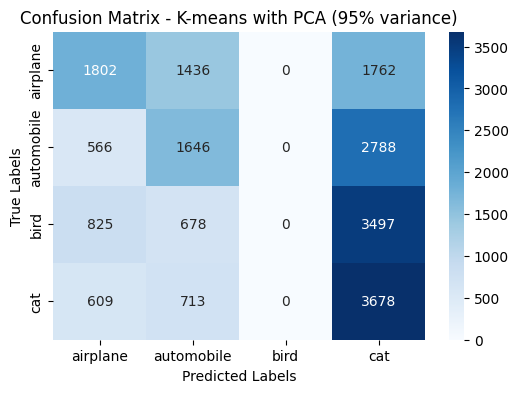

Classification Report - K-means with LDA:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5000
           1       0.82      0.75      0.78      5000
           2       0.73      0.62      0.67      5000
           3       0.66      0.74      0.69      5000

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000



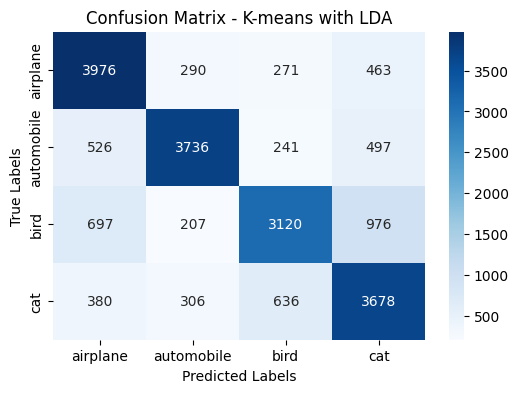

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


label_names_filtered = ["airplane", "automobile", "bird", "cat"]


def map_labels(true_labels, predicted_labels):
    mapping = {}
    for cluster in np.unique(predicted_labels):
        cluster_labels = true_labels[predicted_labels == cluster]
        most_common_label = np.bincount(cluster_labels).argmax()
        mapping[cluster] = most_common_label
    return np.array([mapping[label] for label in predicted_labels])


mapped_labels_kmeans = map_labels(trainy_filtered, kmeans_labels)
mapped_labels_kmeans_pca_95 = map_labels(trainy_filtered, kmeans_pca_95_labels)
mapped_labels_kmeans_lda = map_labels(trainy_filtered, kmeans_lda_labels)

def display_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names_filtered, yticklabels=label_names_filtered)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

print("Classification Report - K-means:")
print(classification_report(trainy_filtered, mapped_labels_kmeans, zero_division=0))
display_confusion_matrix(trainy_filtered, mapped_labels_kmeans, "Confusion Matrix - K-means")

print("Classification Report - K-means with PCA (95% variance):")
print(classification_report(trainy_filtered, mapped_labels_kmeans_pca_95, zero_division=0))
display_confusion_matrix(trainy_filtered, mapped_labels_kmeans_pca_95, "Confusion Matrix - K-means with PCA (95% variance)")

print("Classification Report - K-means with LDA:")
print(classification_report(trainy_filtered, mapped_labels_kmeans_lda, zero_division=0))
display_confusion_matrix(trainy_filtered, mapped_labels_kmeans_lda, "Confusion Matrix - K-means with LDA")


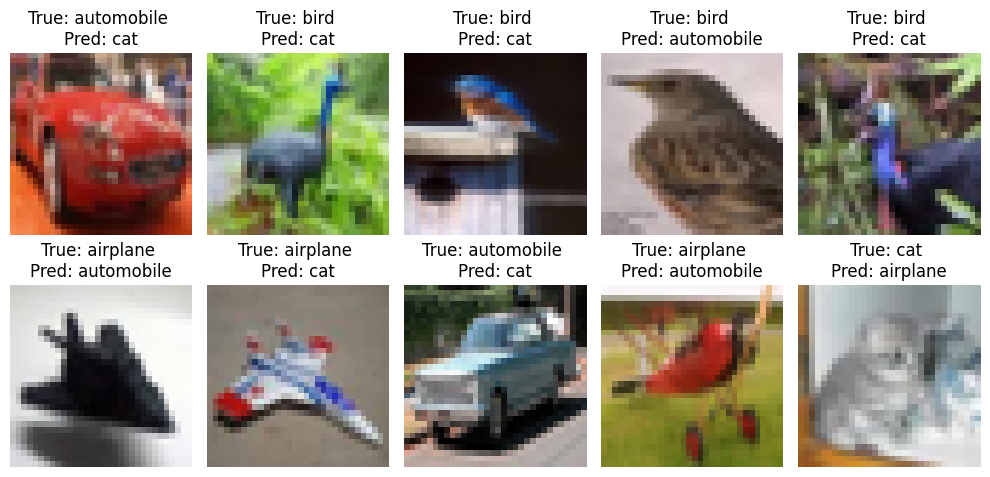

In [39]:
misclassified = trainX_filtered[mapped_labels_kmeans != trainy_filtered]
misclassified_true = trainy_filtered[mapped_labels_kmeans != trainy_filtered]
misclassified_pred = mapped_labels_kmeans[mapped_labels_kmeans != trainy_filtered]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat[:10]):
    ax.imshow(misclassified[i])
    ax.set_title(f"True: {label_names[indices_to_keep[misclassified_true[i]]]} \nPred: {label_names[indices_to_keep[misclassified_pred[i]]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [40]:
pca_enhanced = PCA(n_components=50)
trainX_pca_enhanced = pca_enhanced.fit_transform(trainX_filtered_normalized.reshape(len(trainX_filtered), -1))
kmeans_enhanced = KMeans(n_clusters=4, random_state=42)
kmeans_enhanced_labels = kmeans_enhanced.fit_predict(trainX_pca_enhanced)
